In [2]:
import numpy as np
import math
import scipy
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xarray as xr
import dask
import scipy
import scipy.io as sio
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib import ticker
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from mpl_toolkits.basemap import Basemap
from statistics import mode
from matplotlib import transforms
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
bm = Basemap()

/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [3]:
def latent_space_analysis(Images, title, iden):
    mean_image = np.mean(Images, axis=0)
    var_image = np.std(Images, axis=0)
    cmap="RdBu_r"
    fig, ax = plt.subplots(1,2, figsize=(16,2))
    cs0 = ax[0].imshow(var_image, cmap=cmap)
    ax[0].set_title("Image Standard Deviation")
    cs1 = ax[1].imshow(mean_image, cmap=cmap)
    ax[1].set_title("Image Mean")
    ax[0].set_ylim(ax[0].get_ylim()[::-1])
    ax[1].set_ylim(ax[1].get_ylim()[::-1])
    ax[1].set_xlabel("CRMs")
    ax[0].set_xlabel("CRMs")
    ax[0].set_ylabel("Pressure")
    ax[1].set_yticks([])
    y_ticks = np.arange(1300, 0, -300)
    ax[0].set_yticklabels(y_ticks)
    ax[1].set_yticklabels(y_ticks)
    divider = make_axes_locatable(ax[0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(cs0, cax=cax)
    divider = make_axes_locatable(ax[1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(cs1, cax=cax)
    plt.suptitle(title)
    #plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/model_graphs/latent_space_components/"+iden+'_'+title+'.png')
 

In [4]:
path_to_file = '/DFS-L/DATA/pritchard/gmooers/Workflow/MAPS/SPCAM/100_Days/New_SPCAM5/archive/TimestepOutput_Neuralnet_SPCAM_216/atm/hist/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-00000.nc'
extra_variables = xr.open_dataset(path_to_file)
latitudes = np.squeeze(extra_variables.LAT_20s_to_20n.values)
longitudes = np.squeeze(extra_variables.LON_0e_to_360e.values)

In [5]:
idn = 'Day'
z_test_tsne = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Saved_Data/Diunral_Covariance_Perplexity_40_1000_TSNE_Mean_Var_Latent_Space__83.npy")

Test_Images = np.load("/fast/gmooers/Preprocessed_Data/Global_Patterns/Scaled_Diurnal_Composite.npy")
Max_Scalar = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_Max_Scalar.npy")
Min_Scalar = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_Min_Scalar.npy")
Test_Images = np.interp(Test_Images, (0, 1), (Min_Scalar, Max_Scalar))

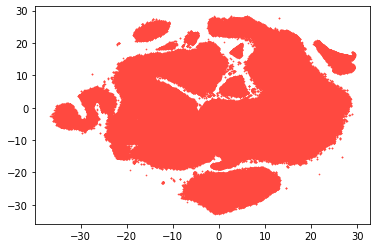

In [6]:
plt.scatter(x=z_test_tsne[:, 0], y=z_test_tsne[:, 1], c="#FF4940", s=0.4, label="Timestep")

In [7]:
print(z_test_tsne.shape)

(304128, 2)


In [8]:
N_cluster=3
km = KMeans(n_clusters=N_cluster, init='k-means++')
y_km = km.fit_predict(z_test_tsne)

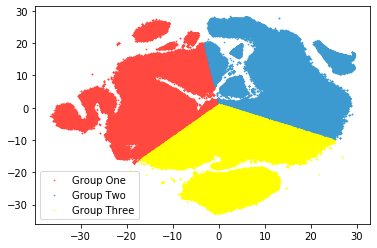

In [9]:
group_one = np.squeeze(z_test_tsne[np.where(y_km == 0),:])
group_two = np.squeeze(z_test_tsne[np.where(y_km == 1),:])
group_three = np.squeeze(z_test_tsne[np.where(y_km == 2),:])
plt.scatter(x=group_one[:, 0], y=group_one[:, 1], c="#FF4940", s=0.4, label="Group One")
plt.scatter(x=group_two[:, 0], y=group_two[:, 1], c="#3D9AD1", s=0.4, label="Group Two")
plt.scatter(x=group_three[:, 0], y=group_three[:, 1], c="yellow", s=0.4, label="Group Three")
plt.legend()

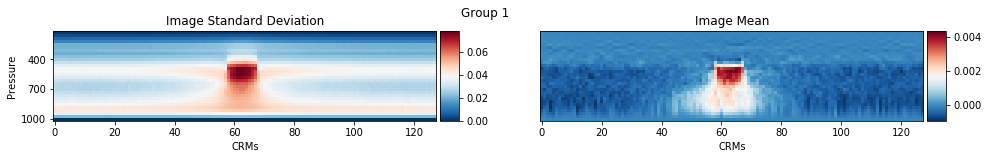

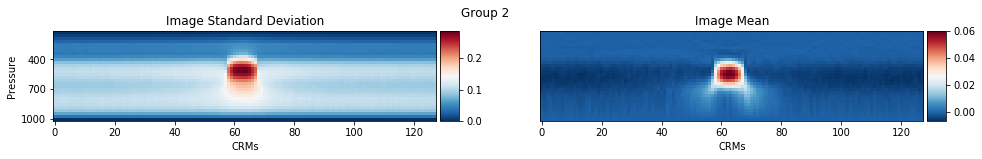

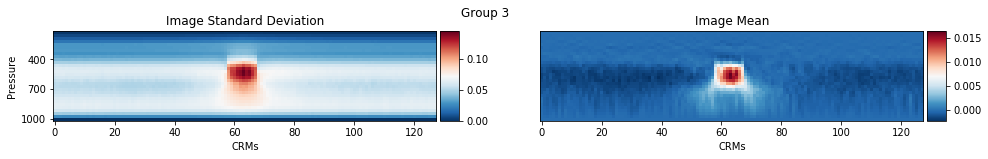

In [10]:
g1 = Test_Images[np.where(y_km==0),:,:]
g2 = Test_Images[np.where(y_km==1),:,:]
g3 = Test_Images[np.where(y_km==2),:,:]

latent_space_analysis(np.squeeze(g1), "Group 1", idn)
latent_space_analysis(np.squeeze(g2), "Group 2", idn)
latent_space_analysis(np.squeeze(g3), "Group 3", idn)

In [11]:
model = Birch(threshold=0.15, n_clusters=3)
# fit the model
model.fit(z_test_tsne)
# assign a cluster to each example
yhat = model.predict(z_test_tsne)

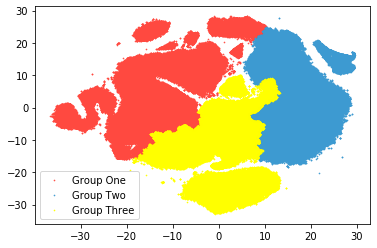

In [12]:
group_one = np.squeeze(z_test_tsne[np.where(yhat == 0),:])
group_two = np.squeeze(z_test_tsne[np.where(yhat == 1),:])
group_three = np.squeeze(z_test_tsne[np.where(yhat == 2),:])
plt.scatter(x=group_one[:, 0], y=group_one[:, 1], c="#FF4940", s=0.4, label="Group One")
plt.scatter(x=group_two[:, 0], y=group_two[:, 1], c="#3D9AD1", s=0.4, label="Group Two")
plt.scatter(x=group_three[:, 0], y=group_three[:, 1], c="yellow", s=0.4, label="Group Three")
plt.legend()

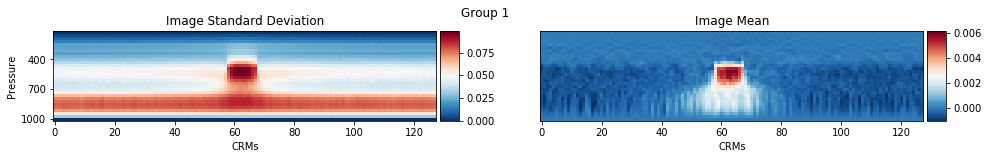

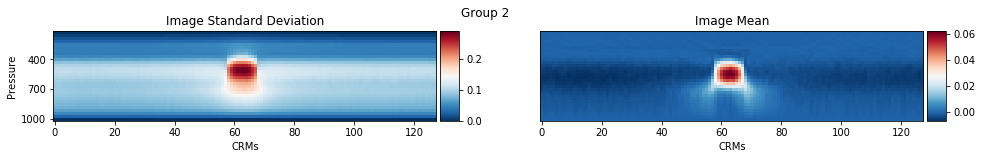

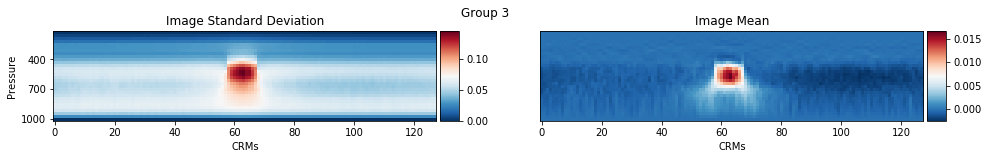

In [13]:
g1 = Test_Images[np.where(yhat==0),:,:]
g2 = Test_Images[np.where(yhat==1),:,:]
g3 = Test_Images[np.where(yhat==2),:,:]

latent_space_analysis(np.squeeze(g1), "Group 1", idn)
latent_space_analysis(np.squeeze(g2), "Group 2", idn)
latent_space_analysis(np.squeeze(g3), "Group 3", idn)

In [14]:
model = Birch(threshold = 0.25, n_clusters=6)
# fit the model
model.fit(z_test_tsne)
# assign a cluster to each example
yhat = model.predict(z_test_tsne)

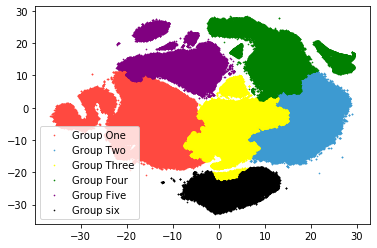

In [15]:
group_one = np.squeeze(z_test_tsne[np.where(yhat == 0),:])
group_two = np.squeeze(z_test_tsne[np.where(yhat == 1),:])
group_three = np.squeeze(z_test_tsne[np.where(yhat == 2),:])
group_four = np.squeeze(z_test_tsne[np.where(yhat == 3),:])
group_five = np.squeeze(z_test_tsne[np.where(yhat == 4),:])
group_six = np.squeeze(z_test_tsne[np.where(yhat == 5),:])
plt.scatter(x=group_one[:, 0], y=group_one[:, 1], c="#FF4940", s=0.4, label="Group One")
plt.scatter(x=group_two[:, 0], y=group_two[:, 1], c="#3D9AD1", s=0.4, label="Group Two")
plt.scatter(x=group_three[:, 0], y=group_three[:, 1], c="yellow", s=0.4, label="Group Three")
plt.scatter(x=group_four[:, 0], y=group_four[:, 1], c="green", s=0.4, label="Group Four")
plt.scatter(x=group_five[:, 0], y=group_five[:, 1], c="purple", s=0.4, label="Group Five")
plt.scatter(x=group_six[:, 0], y=group_six[:, 1], c="black", s=0.4, label="Group six")
plt.legend()

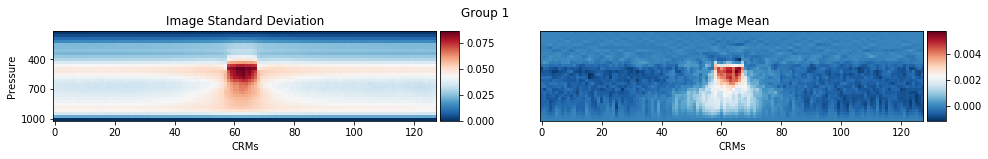

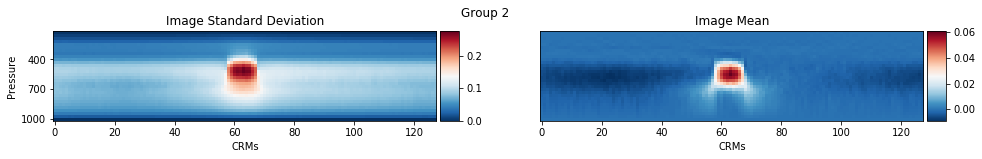

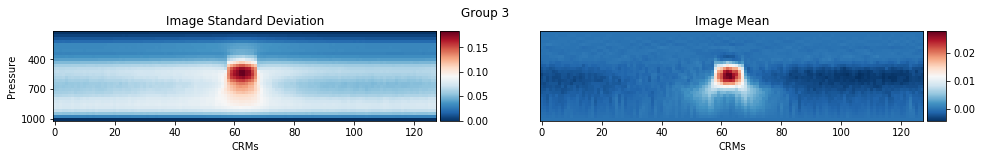

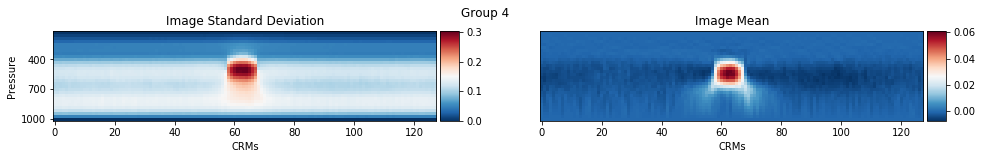

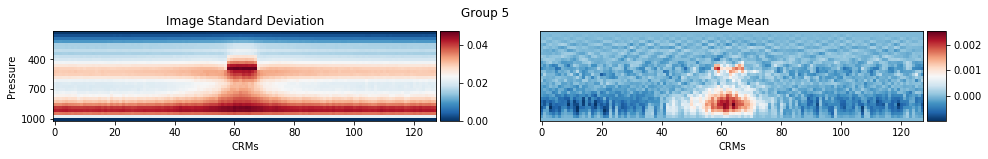

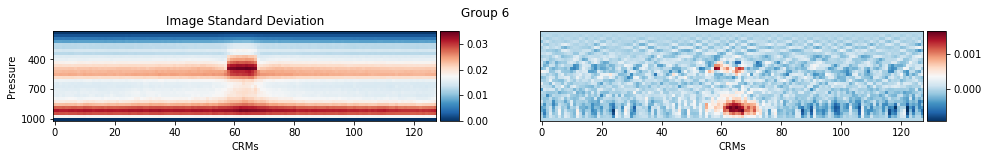

In [16]:
g1 = Test_Images[np.where(yhat==0),:,:]
g2 = Test_Images[np.where(yhat==1),:,:]
g3 = Test_Images[np.where(yhat==2),:,:]
g4 = Test_Images[np.where(yhat==3),:,:]
g5 = Test_Images[np.where(yhat==4),:,:]
g6 = Test_Images[np.where(yhat==5),:,:]

latent_space_analysis(np.squeeze(g1), "Group 1", idn)
latent_space_analysis(np.squeeze(g2), "Group 2", idn)
latent_space_analysis(np.squeeze(g3), "Group 3", idn)
latent_space_analysis(np.squeeze(g4), "Group 4", idn)
latent_space_analysis(np.squeeze(g5), "Group 5", idn)
latent_space_analysis(np.squeeze(g6), "Group 6", idn)

In [17]:
model = Birch(n_clusters=12)
# fit the model
model.fit(z_test_tsne)
# assign a cluster to each example
yhat = model.predict(z_test_tsne)

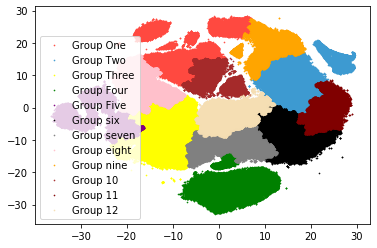

In [18]:
group_one = np.squeeze(z_test_tsne[np.where(yhat == 0),:])
group_two = np.squeeze(z_test_tsne[np.where(yhat == 1),:])
group_three = np.squeeze(z_test_tsne[np.where(yhat == 2),:])
group_four = np.squeeze(z_test_tsne[np.where(yhat == 3),:])
group_five = np.squeeze(z_test_tsne[np.where(yhat == 4),:])
group_six = np.squeeze(z_test_tsne[np.where(yhat == 5),:])
group_seven = np.squeeze(z_test_tsne[np.where(yhat == 6),:])
group_eight = np.squeeze(z_test_tsne[np.where(yhat == 7),:])
group_nine = np.squeeze(z_test_tsne[np.where(yhat == 8),:])
group_ten = np.squeeze(z_test_tsne[np.where(yhat == 9),:])
group_11 = np.squeeze(z_test_tsne[np.where(yhat == 10),:])
group_12 = np.squeeze(z_test_tsne[np.where(yhat == 11),:])
plt.scatter(x=group_one[:, 0], y=group_one[:, 1], c="#FF4940", s=0.4, label="Group One")
plt.scatter(x=group_two[:, 0], y=group_two[:, 1], c="#3D9AD1", s=0.4, label="Group Two")
plt.scatter(x=group_three[:, 0], y=group_three[:, 1], c="yellow", s=0.4, label="Group Three")
plt.scatter(x=group_four[:, 0], y=group_four[:, 1], c="green", s=0.4, label="Group Four")
plt.scatter(x=group_five[:, 0], y=group_five[:, 1], c="purple", s=0.4, label="Group Five")
plt.scatter(x=group_six[:, 0], y=group_six[:, 1], c="black", s=0.4, label="Group six")
plt.scatter(x=group_seven[:, 0], y=group_seven[:, 1], c="grey", s=0.4, label="Group seven")
plt.scatter(x=group_eight[:, 0], y=group_eight[:, 1], c="pink", s=0.4, label="Group eight")
plt.scatter(x=group_nine[:, 0], y=group_nine[:, 1], c="orange", s=0.4, label="Group nine")
plt.scatter(x=group_ten[:, 0], y=group_ten[:, 1], c="brown", s=0.4, label="Group 10")
plt.scatter(x=group_11[:, 0], y=group_11[:, 1], c="maroon", s=0.4, label="Group 11")
plt.scatter(x=group_12[:, 0], y=group_12[:, 1], c="wheat", s=0.4, label="Group 12")
plt.legend()

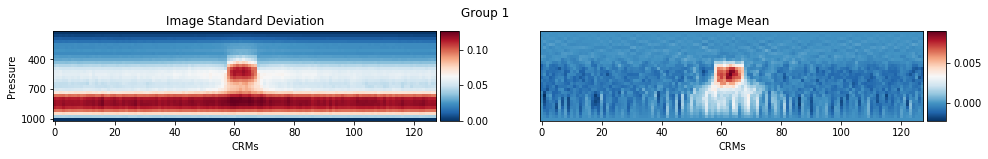

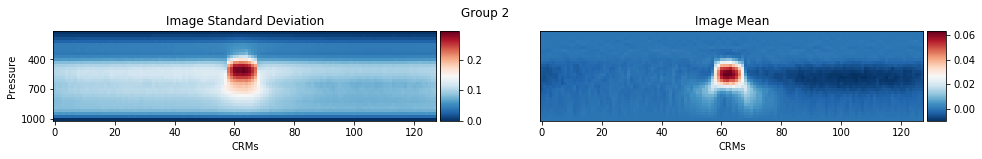

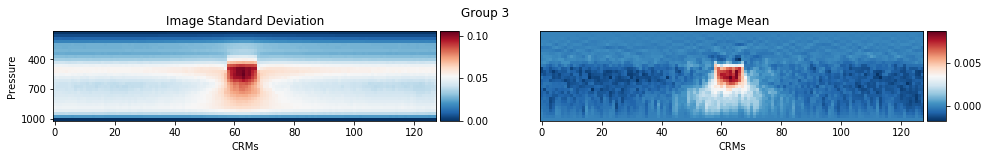

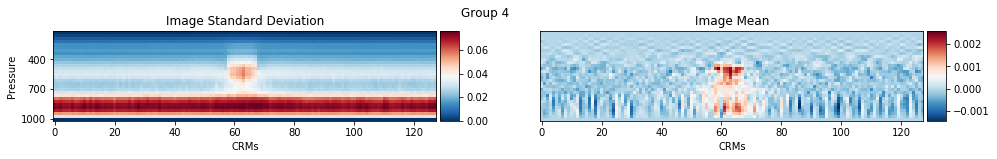

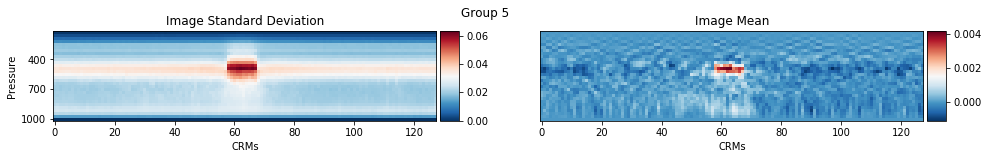

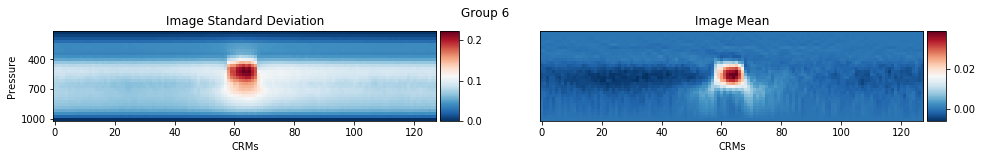

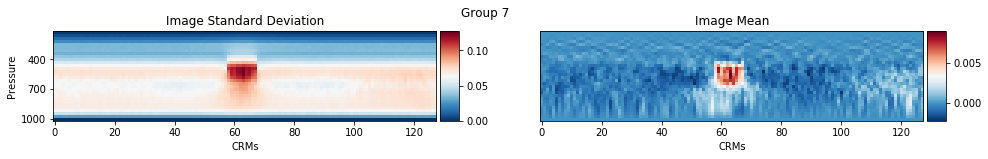

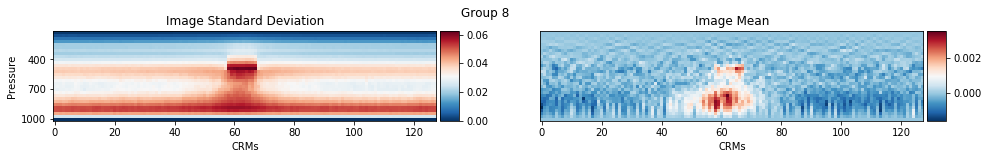

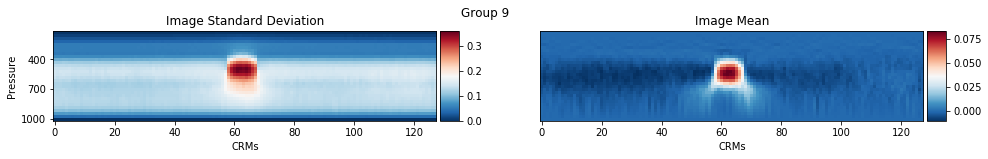

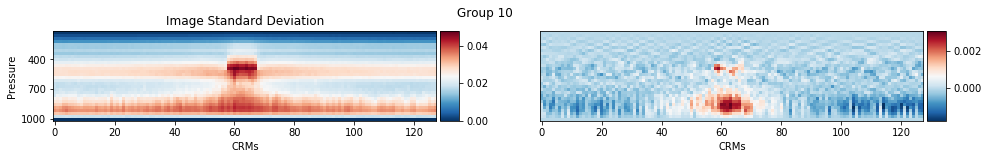

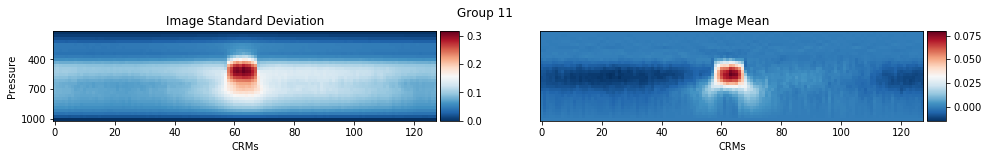

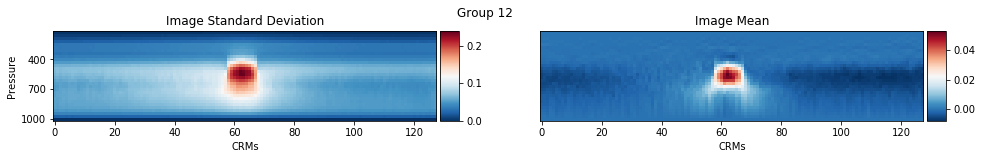

In [19]:
g1 = Test_Images[np.where(yhat==0),:,:]
g2 = Test_Images[np.where(yhat==1),:,:]
g3 = Test_Images[np.where(yhat==2),:,:]
g4 = Test_Images[np.where(yhat==3),:,:]
g5 = Test_Images[np.where(yhat==4),:,:]
g6 = Test_Images[np.where(yhat==5),:,:]
g7 = Test_Images[np.where(yhat==6),:,:]
g8 = Test_Images[np.where(yhat==7),:,:]
g9 = Test_Images[np.where(yhat==8),:,:]
g10 = Test_Images[np.where(yhat==9),:,:]
g11 = Test_Images[np.where(yhat==10),:,:]
g12 = Test_Images[np.where(yhat==11),:,:]

latent_space_analysis(np.squeeze(g1), "Group 1", idn)
latent_space_analysis(np.squeeze(g2), "Group 2", idn)
latent_space_analysis(np.squeeze(g3), "Group 3", idn)
latent_space_analysis(np.squeeze(g4), "Group 4", idn)
latent_space_analysis(np.squeeze(g5), "Group 5", idn)
latent_space_analysis(np.squeeze(g6), "Group 6", idn)
latent_space_analysis(np.squeeze(g7), "Group 7", idn)
latent_space_analysis(np.squeeze(g8), "Group 8", idn)
latent_space_analysis(np.squeeze(g9), "Group 9", idn)
latent_space_analysis(np.squeeze(g10), "Group 10", idn)
latent_space_analysis(np.squeeze(g11), "Group 11", idn)
latent_space_analysis(np.squeeze(g12), "Group 12", idn)

In [20]:
labels = np.zeros(shape=(len(z_test_tsne)))
labels[:] = np.nan
time = 96
lat = 22
lon = 144
reformed_array = np.zeros(shape=(time,lat,lon))
reformed_array[:,:,:] = np.nan

Labeling Scheme:

- np.nan: Little Convection
- 1: Shallow Convection
- 2: Transition
- 3: Deep Convection

In [23]:
labels[np.where(yhat==0)] = 1.0
labels[np.where(yhat==1)] = 3.0
labels[np.where(yhat==2)] = np.nan
labels[np.where(yhat==3)] = 1.0
labels[np.where(yhat==4)] = np.nan
labels[np.where(yhat==5)] = 3.0
labels[np.where(yhat==6)] = 2.0
labels[np.where(yhat==7)] = 2.0
labels[np.where(yhat==8)] = 3.0
labels[np.where(yhat==9)] = 2.0
labels[np.where(yhat==10)] = 3.0
labels[np.where(yhat==11)] = 3.0

In [24]:
count = 0
for i in range(time):
    for j in range(lat):
        for k in range(lon):
            reformed_array[i,j,k] = labels[count]
            count = count+1

In [25]:
new_lons, new_lats = np.meshgrid(longitudes, latitudes)

In [26]:
def timing(times):
    utc_list = []
    lst_list = []
    end_times = [':00',':15',':30',':45']
    counter = 0
    for i in range(times):
        thing = i
        beg_time = int(thing/4)
        if beg_time == 24:
            beg_time = 24
        ending = end_times[counter]
        counter = counter + 1
        if counter  == 4:
            counter = 0
        
        utc_time = str(beg_time)+ending
        utc_list.append(utc_time)
        

    return utc_list

/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


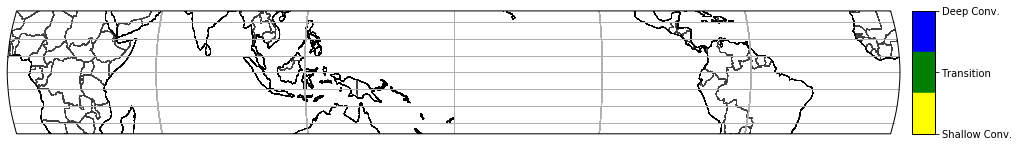

In [27]:
def conv_movie(label_schemes, X_var, Y_var):
    #cmap = matplotlib.colors.ListedColormap(["red", "purple", "blue"])
    cmap = matplotlib.colors.ListedColormap(["yellow", "green", "blue"])
    norm = matplotlib.colors.BoundaryNorm(np.arange(1,5), cmap.N) 
    fig, ax1 = plt.subplots(1,1,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
    fig.set_size_inches(16,12)
    feat_list = []
    times = timing(len(label_schemes))
    for i in range(len(label_schemes)):
        label_scheme = np.squeeze(label_schemes[i,:,:])
        
        contour_plot = ax1.pcolormesh(X_var, Y_var, label_scheme,cmap=cmap, edgecolor ='none', alpha=0.7, transform=ccrs.PlateCarree(), animated = True)
        cax = fig.add_axes([ax1.get_position().x1+0.01,ax1.get_position().y0,0.02,ax1.get_position().height])
        cbar = plt.colorbar(contour_plot,cax=cax, ticks=np.linspace(0,3,4))
        cbar.ax.set_yticklabels(["Nothing","Shallow Conv.","Transition","Deep Conv."])
        #ax1.set_title('VAE Based Convection Identification')
        #ax1.title.set_fontsize(16)
        ax1.coastlines(linewidth=0.5,edgecolor='0.25')
        ax1.gridlines()
        ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
        
        #plt.xlabel('Longitude',fontsize=15)
        #plt.ylabel('Latitude', fontsize=15)
        title = ax1.text(0.5,1.05,"VAE Convection Predictions at ".format(i)+str(times[i])+" UTC".format(i), 
                    size=plt.rcParams["axes.titlesize"],
                    ha="center", transform=ax1.transAxes, )
        feat_list.append([contour_plot, title])
        
        
    #plt.gca().invert_yaxis()
    ani = animation.ArtistAnimation(fig, feat_list, interval = 180, blit = False, repeat = True)
    ani.save('/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Animations/Figures/83_Diurnal_Composite.mp4')
    plt.show()
    
conv_movie(reformed_array[:,:,:], new_lons, new_lats)

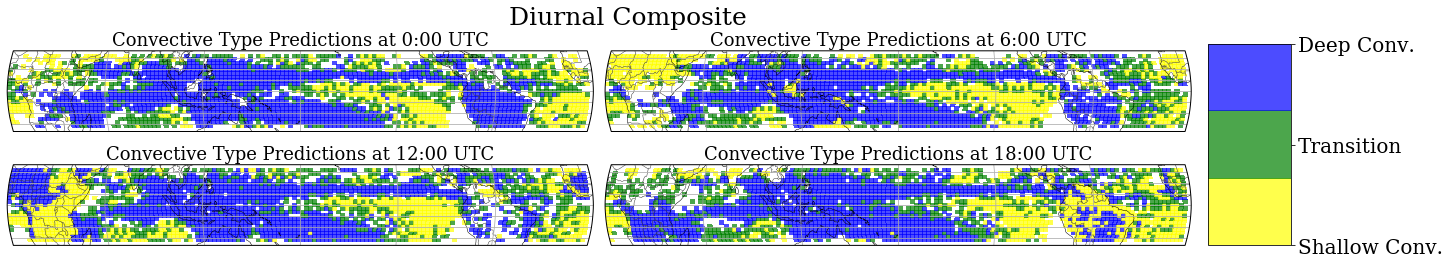

In [47]:
fz = 15
lw = 3
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement


plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

cmap = matplotlib.colors.ListedColormap(["yellow", "green", "blue"])
norm = matplotlib.colors.BoundaryNorm(np.arange(1,5), cmap.N) 
fig, ax = plt.subplots(2,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.set_size_inches(23,4)
#fig.set_size_inches(46,8)

contour_plot = ax[0,0].pcolormesh(new_lons, new_lats, np.squeeze(reformed_array[0,:,:]),cmap=cmap, edgecolor ='none', alpha=0.7, transform=ccrs.PlateCarree(), animated = True)
ax[0,0].coastlines(linewidth=0.5,edgecolor='0.25')
ax[0,0].gridlines()
ax[0,0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
ax[0,0].set_title("Convective Type Predictions at 0:00 UTC")

contour_plot = ax[0,1].pcolormesh(new_lons, new_lats, np.squeeze(reformed_array[24,:,:]),cmap=cmap, edgecolor ='none', alpha=0.7, transform=ccrs.PlateCarree(), animated = True)
ax[0,1].coastlines(linewidth=0.5,edgecolor='0.25')
ax[0,1].gridlines()
ax[0,1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
ax[0,1].set_title("Convective Type Predictions at 6:00 UTC")

contour_plot = ax[1,0].pcolormesh(new_lons, new_lats, np.squeeze(reformed_array[48,:,:]),cmap=cmap, edgecolor ='none', alpha=0.7, transform=ccrs.PlateCarree(), animated = True)
ax[1,0].coastlines(linewidth=0.5,edgecolor='0.25')
ax[1,0].gridlines()
ax[1,0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
ax[1,0].set_title("Convective Type Predictions at 12:00 UTC")



contour_plot = ax[1,1].pcolormesh(new_lons, new_lats, np.squeeze(reformed_array[72,:,:]),cmap=cmap, edgecolor ='none', alpha=0.7, transform=ccrs.PlateCarree(), animated = True)
ax[1,1].coastlines(linewidth=0.5,edgecolor='0.25')
ax[1,1].gridlines()
ax[1,1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
ax[1,1].set_title("Convective Type Predictions at 18:00 UTC")

fig.subplots_adjust(top=0.85, right=0.84)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(contour_plot, cax=cbar_ax, ticks=np.linspace(0,3,4))
cbar.ax.set_yticklabels(["Nothing","Shallow Conv.","Transition","Deep Conv."], fontsize=20)
plt.suptitle("Diurnal Composite", fontsize = 25)
plt.subplots_adjust(wspace=0.02)

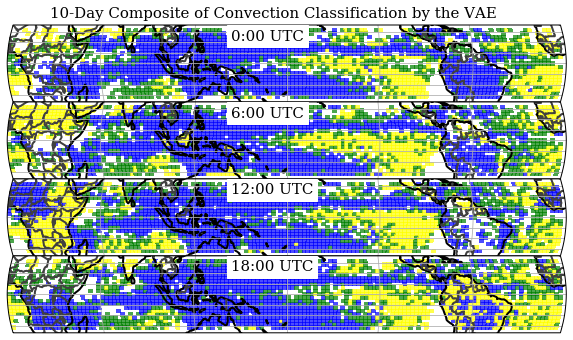

In [29]:
fz = 15
lw = 3
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement
LWC = 2.0

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

cmap = matplotlib.colors.ListedColormap(["yellow", "green", "blue"])
norm = matplotlib.colors.BoundaryNorm(np.arange(1,5), cmap.N) 
fig, ax = plt.subplots(4,1,figsize=(15,5),subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
#fig.set_size_inches(16,12)
#fig.set_size_inches(15,5)

contour_plot = ax[0].pcolormesh(new_lons, new_lats, np.squeeze(reformed_array[0,:,:]),cmap=cmap, edgecolor ='none', alpha=0.7, transform=ccrs.PlateCarree(), animated = True)
t = ax[0].text(0.4, 0.80, '0:00 UTC', transform=ax[0].transAxes, fontsize=fz)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='white'))
ax[0].coastlines(linewidth=LWC,edgecolor='0.25')
ax[0].gridlines()
ax[0].add_feature(cfeature.BORDERS,linewidth=LWC,edgecolor='0.25')
#ax[0].set_title("0:00 UTC", fontsize=fz)

contour_plot = ax[1].pcolormesh(new_lons, new_lats, np.squeeze(reformed_array[24,:,:]),cmap=cmap, edgecolor ='none', alpha=0.7, transform=ccrs.PlateCarree(), animated = True)
t = ax[1].text(0.4, 0.80, '6:00 UTC', transform=ax[1].transAxes, fontsize=fz)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='white'))
ax[1].coastlines(linewidth=LWC,edgecolor='0.25')
ax[1].gridlines()
ax[1].add_feature(cfeature.BORDERS,linewidth=LWC,edgecolor='0.25')
#ax[1].set_title("6:00 UTC", fontsize=fz)

contour_plot = ax[2].pcolormesh(new_lons, new_lats, np.squeeze(reformed_array[48,:,:]),cmap=cmap, edgecolor ='none', alpha=0.7, transform=ccrs.PlateCarree(), animated = True)
t = ax[2].text(0.4, 0.80, '12:00 UTC', transform=ax[2].transAxes, fontsize=fz)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='white'))
ax[2].coastlines(linewidth=LWC,edgecolor='0.25')
ax[2].gridlines()
ax[2].add_feature(cfeature.BORDERS,linewidth=LWC,edgecolor='0.25')
#ax[2].set_title("12:00 UTC", fontsize=fz)

contour_plot = ax[3].pcolormesh(new_lons, new_lats, np.squeeze(reformed_array[72,:,:]),cmap=cmap, edgecolor ='none', alpha=0.7, transform=ccrs.PlateCarree(), animated = True)
t = ax[3].text(0.4, 0.80, '18:00 UTC', transform=ax[3].transAxes, fontsize=fz)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='white'))
ax[3].coastlines(linewidth=LWC,edgecolor='0.25')
ax[3].gridlines()
ax[3].add_feature(cfeature.BORDERS,linewidth=LWC,edgecolor='0.25')
#ax[3].set_title("18:00 UTC", fontsize=fz)

fig.subplots_adjust(top=0.98, right=0.9)
#cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
#cbar = fig.colorbar(contour_plot, cax=cbar_ax, ticks=np.linspace(0,3,4))
#cbar.ax.set_yticklabels(["Nothing","Shallow Conv.","Transition","Deep Conv."], fontsize=fz)
plt.suptitle("10-Day Composite of Convection Classification by the VAE", fontsize = fz, y=1.03)
plt.subplots_adjust(hspace=0, wspace=0.01)
plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Diurnal_Composite.png")
plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Diurnal_Composite.pdf")